In [9]:
import pandas as pd
df = pd.read_csv('Electrical.csv')
df.head()
df = df.drop('stab',axis=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


Precision : 0.89
Recall : 0.19
F1 : 0.39

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('stabf',axis=1)
y = df['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
base_model = RandomForestClassifier(random_state =1)
base_model.fit(X_train,y_train)
base_pred = base_model.predict(X_test)

In [20]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix 
accuracy = accuracy_score(y_true=y_test, y_pred=base_pred)
print( 'Accuracy of Random Forest:', accuracy )

Accuracy of Random Forest: 0.929


In [23]:
import xgboost as xgb
# fit model no training data
model = xgb.XGBClassifier(random_state=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
# make predictions for test data
xgb_pred = model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy:", (xgb_accuracy ))

Accuracy: 0.9195


In [36]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
lgb_pred = model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)
print("Accuracy:", (lgb_accuracy ))

Accuracy: 0.9375


In [40]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=1)
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 
extra_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features}

In [42]:
from sklearn.model_selection import RandomizedSearchCV

etc_random = RandomizedSearchCV(estimator = etc, param_distributions = extra_grid, cv = 5,random_state=1,n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
# Fit the random search model
etc_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [43]:
etc_random.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [46]:
etc_random1 = RandomizedSearchCV(estimator = etc,random_state=1,param_distributions = extra_grid)
# Fit the random search model
etc_random1.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                     

In [47]:
etc_random1.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [48]:
etc_param = ExtraTreesClassifier(random_state=1,max_features=None,min_samples_leaf = 8,min_samples_split = 2,n_estimators= 1000)
etc_param.fit(X_train,y_train)
etc_param = etc_param.predict(X_test)
etcp_accuracy = accuracy_score(y_test, etc_param)
print("Accuracy:", (etcp_accuracy ))

Accuracy: 0.927


In [49]:
etc.fit(X_train,y_train)
etc = etc.predict(X_test)
etc_accuracy = accuracy_score(y_test, etc)
print("Accuracy:", (etc_accuracy ))

Accuracy: 0.928


In [51]:
import numpy as np
extra_tree_forest = ExtraTreesClassifier( criterion ='entropy',)
# Training the model 
extra_tree_forest.fit(X_train, y_train) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

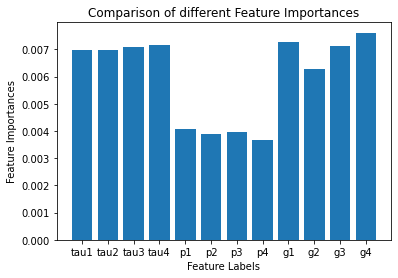

In [53]:
import matplotlib.pyplot as plt
# Plotting a Bar Graph to compare the models 
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 